Setup

In [ ]:
#Carga de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [ ]:
#Leemos el archivo csv a un Dataframe

#Path en Google Drive
path = "/content/drive/My Drive/PUC/MTIG/2020/Ciencia de los Datos y sus aplicaciones/Proyecto/Data_Propiedades_Ejemplo_2018.csv"

#Primer intento de lectura, le indicamos las columnas fecha que debe transformar en fecha
df = pd.read_csv(path, sep=';' , thousands='.', header='infer', parse_dates=['FECHA_ENTR','FECHA_PUBLICACION'], decimal=',', encoding= 'unicode_escape')

#Vemos los tipos de datos que "estimo" para cada uno
df.dtypes

ANO_ENTREGA                 float64
COMUNA                       object
DIRECCION                    object
ESTADO                       object
FECHA_ENTR           datetime64[ns]
FECHA_PUBLICACION    datetime64[ns]
INMOBILIARIA                float64
MODALIDAD                    object
N_BANOS                     float64
N_DORMITORIOS               float64
MONEDA                       object
REGION                       object
TIPO                         object
PRECIO_DESPLIEGUE            object
UF                          float64
UF_DESDE                    float64
UF_HASTA                    float64
M2_TOTALES                  float64
M2_CONSTRUIDOS              float64
M2_DESDE                    float64
M2_HASTA                    float64
dtype: object

In [ ]:
#Vemos primeras filas
df.head()

,ANO_ENTREGA,COMUNA,DIRECCION,ESTADO,FECHA_ENTR,FECHA_PUBLICACION,INMOBILIARIA,MODALIDAD,N_BANOS,N_DORMITORIOS,MONEDA,REGION,TIPO,PRECIO_DESPLIEGUE,UF,UF_DESDE,UF_HASTA,M2_TOTALES,M2_CONSTRUIDOS,M2_DESDE,M2_HASTA
0,nan,ALTO HOSPICIO,CALLE DOS 3276,USADA,NaT,2019-04-26,nan,ARRIENDO,1.00,3.00,UF,I,CASAS,"UF 9,00",9.00,nan,nan,70.00,65.00,nan,nan
1,nan,IQUIQUE,PRESIDENTE ERRAZURIZ / ORELLA,USADA,NaT,2019-09-05,nan,ARRIENDO,1.00,3.00,UF,I,CASAS,"UF 12,99",12.99,nan,nan,60.00,55.00,nan,nan
2,nan,IQUIQUE,PLAYA BLANCA 2515,USADA,NaT,2019-07-06,nan,ARRIENDO,3.00,2.00,UF,I,CASAS,"UF 16,20",16.20,nan,nan,90.00,190.00,nan,nan
3,nan,IQUIQUE,CASA PASAJE VINA DEL MAR,USADA,NaT,2019-07-06,nan,ARRIENDO,3.00,4.00,UF,I,CASAS,"UF 18,00",18.00,nan,nan,200.00,143.00,nan,nan
4,nan,POZO ALMONTE,CASA POZO ALMONTE 01,USADA,NaT,2019-03-05,nan,ARRIENDO,2.00,5.00,UF,I,CASAS,"UF 19,87",19.87,nan,nan,198.00,198.00,nan,nan


In [ ]:
#Filas vs columbas
df.shape

(26601, 21)

In [ ]:
#Info sobre los campos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26601 entries, 0 to 26600
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ANO_ENTREGA        0 non-null      float64       
 1   COMUNA             26601 non-null  object        
 2   DIRECCION          26597 non-null  object        
 3   ESTADO             26601 non-null  object        
 4   FECHA_ENTR         0 non-null      datetime64[ns]
 5   FECHA_PUBLICACION  26601 non-null  datetime64[ns]
 6   INMOBILIARIA       0 non-null      float64       
 7   MODALIDAD          26601 non-null  object        
 8   N_BANOS            26262 non-null  float64       
 9   N_DORMITORIOS      26085 non-null  float64       
 10  MONEDA             26601 non-null  object        
 11  REGION             26601 non-null  object        
 12  TIPO               26601 non-null  object        
 13  PRECIO_DESPLIEGUE  26601 non-null  object        
 14  UF    

In [ ]:
#Nos quedamos solo con las columnas (campos) no nulos
df2 = df[['COMUNA','DIRECCION','ESTADO','FECHA_PUBLICACION','MODALIDAD','N_BANOS','N_DORMITORIOS','MONEDA','REGION','TIPO','PRECIO_DESPLIEGUE','UF','M2_TOTALES','M2_CONSTRUIDOS']]

#comprobamos
df2.head()

,COMUNA,DIRECCION,ESTADO,FECHA_PUBLICACION,MODALIDAD,N_BANOS,N_DORMITORIOS,MONEDA,REGION,TIPO,PRECIO_DESPLIEGUE,UF,M2_TOTALES,M2_CONSTRUIDOS
0,ALTO HOSPICIO,CALLE DOS 3276,USADA,2019-04-26,ARRIENDO,1.0,3.0,UF,I,CASAS,"UF 9,00",9.00,70.0,65.0
1,IQUIQUE,PRESIDENTE ERRAZURIZ / ORELLA,USADA,2019-09-05,ARRIENDO,1.0,3.0,UF,I,CASAS,"UF 12,99",12.99,60.0,55.0
2,IQUIQUE,PLAYA BLANCA 2515,USADA,2019-07-06,ARRIENDO,3.0,2.0,UF,I,CASAS,"UF 16,20",16.20,90.0,190.0
3,IQUIQUE,CASA PASAJE VINA DEL MAR,USADA,2019-07-06,ARRIENDO,3.0,4.0,UF,I,CASAS,"UF 18,00",18.00,200.0,143.0
4,POZO ALMONTE,CASA POZO ALMONTE 01,USADA,2019-03-05,ARRIENDO,2.0,5.0,UF,I,CASAS,"UF 19,87",19.87,198.0,198.0


In [ ]:
#Análisis variables categóricas

In [ ]:
df2['COMUNA'].value_counts()

LAS CONDES        5324
VINA DEL MAR      2377
SANTIAGO          2185
VITACURA          1666
LO BARNECHEA      1504
                  ... 
CERRO NAVIA          1
LITUECHE             1
NUEVA IMPERIAL       1
HIJUELAS             1
CONSTITUCION         1
Name: COMUNA, Length: 169, dtype: int64

In [ ]:
df2['REGION'].value_counts()

RM      17397
V        5122
IV        967
VIII      920
II        752
IX        307
VI        307
X         247
I         179
VII       176
III       120
XIV        91
XI          7
XII         6
XV          3
Name: REGION, dtype: int64

In [ ]:
df2['ESTADO'].value_counts() #Son todas usadas, no agrega más información

USADA    26601
Name: ESTADO, dtype: int64

In [ ]:
df2['MODALIDAD'].value_counts() #Idem

ARRIENDO    26601
Name: MODALIDAD, dtype: int64

In [ ]:
df2['MONEDA'].value_counts()

UF     26502
UFM       99
Name: MONEDA, dtype: int64

In [ ]:
df2['TIPO'].value_counts()

DEPARTAMENTOS               18672
CASAS                        6392
OFICINAS                     1519
CASAS APTA PARA OFICINAS       18
Name: TIPO, dtype: int64

In [ ]:
#Para simplificar el análisis (en esta ocasión):
#1. Me quedaré solo con departamentos
#2. Me quedaré sólo con quienes tengan la moneda en UF
#3. Quitaré las columnas que no entreguen más información
df3 = df2.loc[(df2['TIPO']=="DEPARTAMENTOS") & (df2['MONEDA']=="UF")]
df3 = df3[['COMUNA','DIRECCION','FECHA_PUBLICACION','N_BANOS','N_DORMITORIOS','REGION','PRECIO_DESPLIEGUE','UF','M2_TOTALES','M2_CONSTRUIDOS']]

df3.head()

,COMUNA,DIRECCION,FECHA_PUBLICACION,N_BANOS,N_DORMITORIOS,REGION,PRECIO_DESPLIEGUE,UF,M2_TOTALES,M2_CONSTRUIDOS
25,IQUIQUE,CASINO,2019-07-03,4.0,4.0,I,"UF 58,05",58.05,228.0,200.0
26,IQUIQUE,$325.000.-ALTOS DRAGON,2019-04-18,1.0,2.0,I,"UF 11,69",11.69,67.0,65.0
27,IQUIQUE,ESTUPENDO Y AMPLIO DEPARTAMENTO,2018-10-01,2.0,3.0,I,"UF 18,65",18.65,125.0,120.0
28,IQUIQUE,EDIFICIO COSTA EL AGUILA,2018-12-06,1.0,2.0,I,"UF 19,18",19.18,65.0,65.0
29,IQUIQUE,AV ARTURO PRAT CERCA CASINO,2019-11-06,1.0,1.0,I,"UF 12,23",12.23,55.0,49.0


In [ ]:
#Vemos cuanto tenemos remanente
df3.shape

(18671, 10)

In [ ]:
#Veamos estadísticas descriptivas
pd.options.display.float_format = "{:.2f}".format
df3.describe()

,N_BANOS,N_DORMITORIOS,UF,M2_TOTALES,M2_CONSTRUIDOS
count,18595.00,18622.00,18671.00,17766.00,18382.00
mean,1.98,2.30,173.20,121.11,118.21
std,1.14,1.03,11371.10,2480.99,2034.46
min,1.00,1.00,0.04,1.00,1.00
25%,1.00,2.00,12.96,51.00,49.00
50%,2.00,2.00,18.10,75.00,70.00
75%,2.00,3.00,30.75,120.00,110.00
max,91.00,32.00,1100000.00,330000.00,180116.00


Análisis gráfico (preliminar)

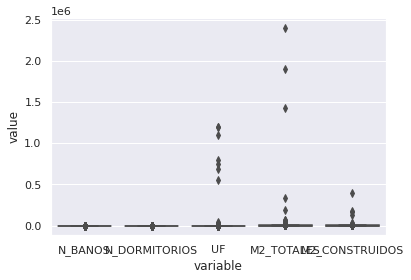

In [ ]:
#Box Plot
sns.boxplot(x="variable", y="value", data=pd.melt(df[['N_BANOS','N_DORMITORIOS','UF','M2_TOTALES','M2_CONSTRUIDOS']]))

plt.show()

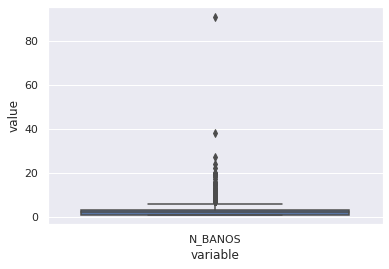

In [ ]:
#Box Plot Baños
sns.boxplot(x="variable", y="value", data=pd.melt(df[['N_BANOS']]))

plt.show()

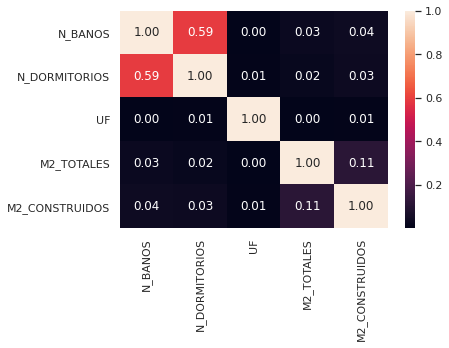

In [ ]:
#Correlación
sns.heatmap(df3.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
#Filtremos en base a las estadísticas
#Baños > 5
#Dormitorios > 5
#UF > 150
#M2_TOTALES > 250
#M2_CONTRUIDOS > 250
df4 = df3.loc[(df3['N_BANOS']<=5) & (df3['N_DORMITORIOS']<=5) & (df3['UF']<=150) & (df3['M2_TOTALES']<=250) & (df3['M2_CONSTRUIDOS']<=250)]

df4.shape

(16941, 10)

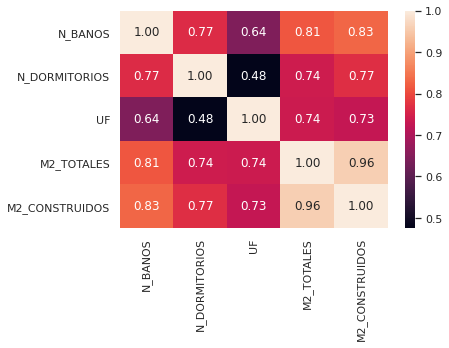

In [ ]:
#Correlación
sns.heatmap(df4.corr(), annot=True, fmt=".2f")
plt.show()

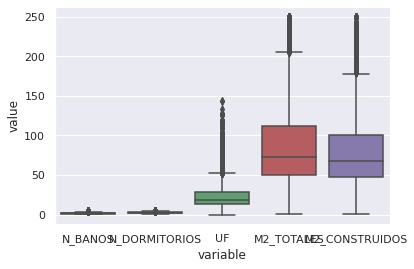

In [ ]:
#Box Plot
sns.boxplot(x="variable", y="value", data=pd.melt(df4[['N_BANOS','N_DORMITORIOS','UF','M2_TOTALES','M2_CONSTRUIDOS']]))

plt.show()

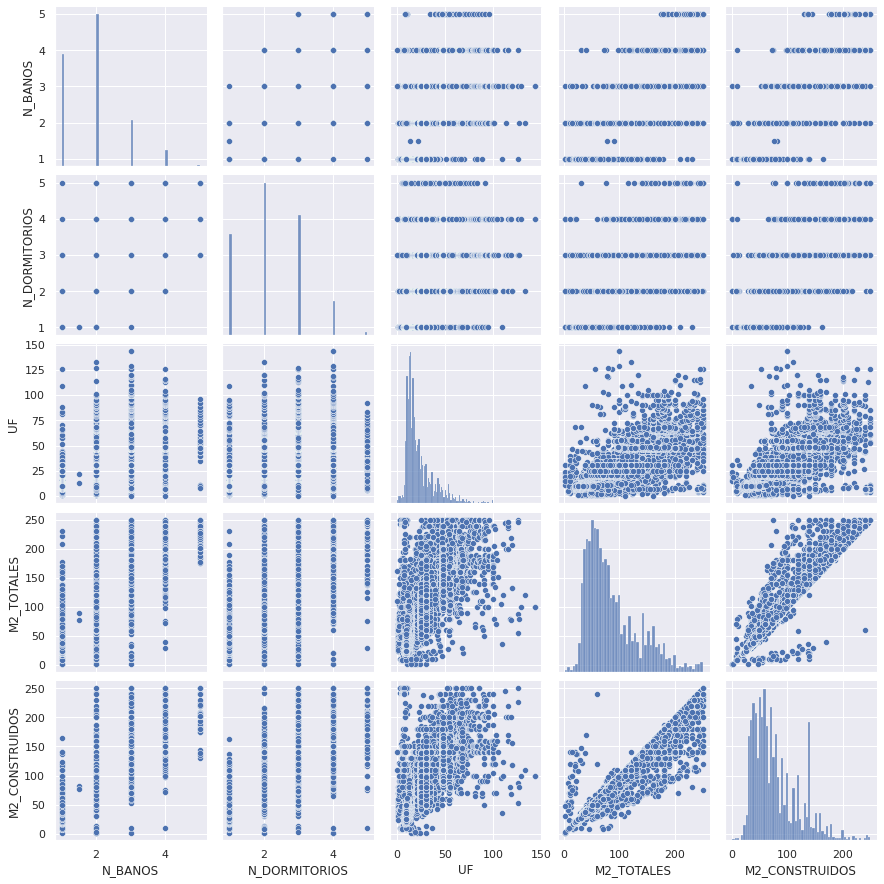

In [ ]:
#pairplot
sns.pairplot(df4)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


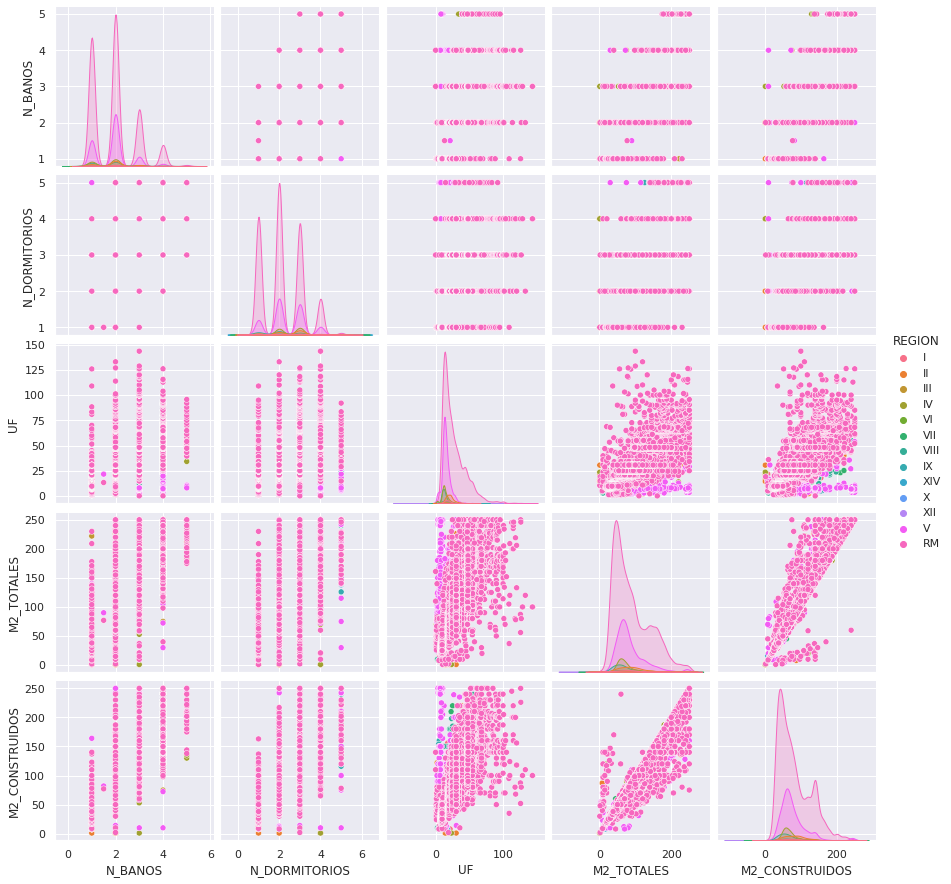

In [ ]:
#pairplot
sns.pairplot(df4,hue='REGION')
plt.show()

In [ ]:
#las condes
df_lc = df4.loc[df4["COMUNA"]=="LAS CONDES"]

df_lc.shape

(4350, 10)

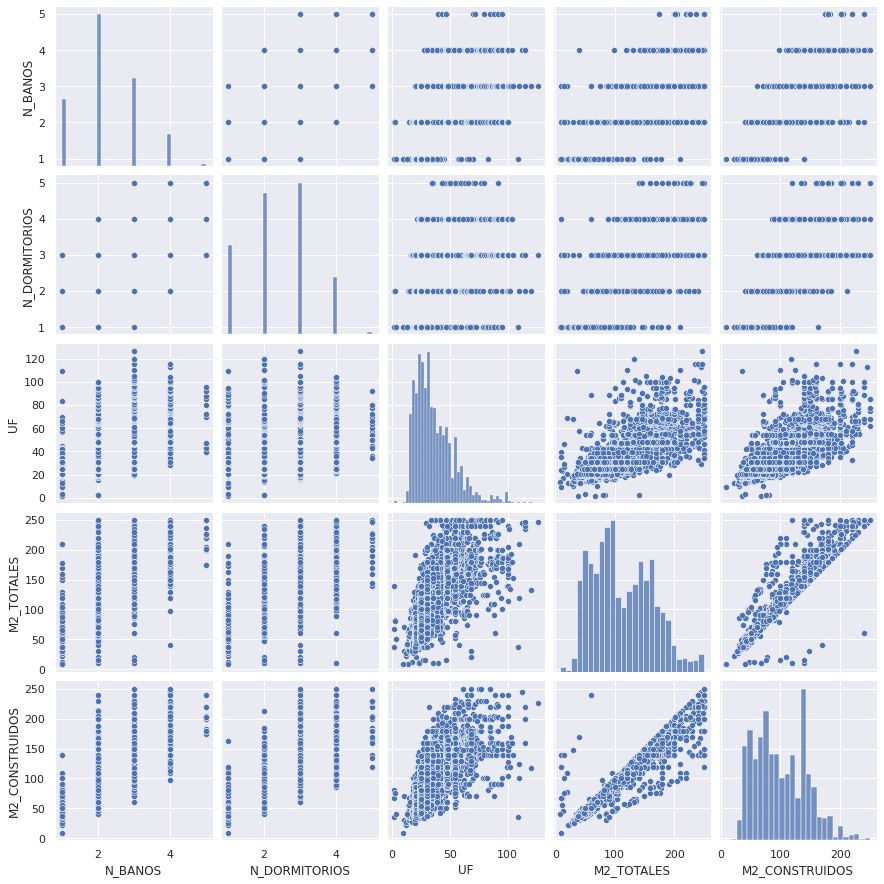

In [ ]:
#pairplot
sns.pairplot(df_lc)
plt.show()